## Ejercicio 1 (4 puntos)

La función de Rosenbrock se define como 

$$ f(x_1, x_2) = 100\left(x_2 − x_1^2 \right)^2 + (1 − x_1)^2. $$

1. Calcule las expresiones del gradiente y la Hessiana de la función de Rosenbrock.
2. Escriba las funciones en Python que evaluan la función de Rosenbrock, su gradiente y Hessiana.
3. Muestre que $x_* = (1,1)^{\top}$ es el único punto estacionario de la función.
4. Calcule los eigenvalores de la matriz Hessiana de $f$ en el punto $x_*$
   para mostrar que es definida positiva, por lo que $x_*$ corresponde
   a un mínimo.
5. Grafique la función de Rosenbrock en el rectángulo $[-1.5, 1.5] \times [-1, 2]$.
   Use las funciones `surface()` e `imshow()` para generar la gráfica 3D y 
   la vista 2D.


### Solución:

El gradiente de $f$ es 
$$\bigtriangledown f(x_1,x_2)=\begin{pmatrix}-400(x_2-x_1^2)x_1-2(1-x_1)&\\ &\\200(x_2-x_1^2)&\end{pmatrix}$$
y el hessiano 
$$ H(x_1,x_2)=\begin{pmatrix}1200x_1^2-400x_2+2 & -400x_1\\ -400x_1 & 200\end{pmatrix}.$$

Las definiciones de las expresiones anteriores junto a la definición de la función de Rosenbrock se encuentran en el módulo `lib_t3.py`. Por lo que con esto tenemos los puntos 1 y 2. 

Para el punto 3 debemos probar que $x_\ast=(1,1)^T$ es el único punto estacionario de la función de Rosenbrock. Entonces debemos resolver la ecuación
$$ \bigtriangledown f(\mathbf{x})=(0,0)^T,$$
donde $\mathbf{x}=(x_1,x_2)\in\mathbb{R}^2$.

Igualando a $0$ cada componente del gradiente tenemos que queremos hallar $\mathbf{x}\in\mathbb{R}^2$ tal que 
$$200(x_2-x_1^2)=0,$$
y
$$-400(x_2-x_1^2)x_1-2(1-x_1)=0.$$

De la primer idendidad se tiene que cumplir $x_2=x_1^2$, sustituyendo en la segunda ecuación obtenemos que se debe satisfacer
$$2(1-x_1)=0,$$
lo que pasa sólo si $x_1=1$, luego $x_2=1$, por lo que el único punto estacionario de $f$ es $x_\ast=(1,1)^T$, que es lo que queríamos probar.

A continuación escribimos el código con el que obtenemos los eigenvalores de la matriz $H(x_\ast)$.

In [1]:
# Respuesta 1.4.
from scipy import linalg
import lib_t3
from lib_t3 import *
import numpy as np

np.set_printoptions(precision=4)
x_ast=np.ones(2)
eigen_val_x_ast=linalg.eigvals(hess_Rosenbrock(x_ast))
print('Eigenvalores de H(1,1): ',eigen_val_x_ast)

Eigenvalores de H(1,1):  [1.0016e+03+0.j 3.9936e-01+0.j]


Como la parte imaginaria es $0$ tenemos que $H(x_\ast)$ es una matriz con valores propios reales y positivos, entonces $H(x_\ast)$ es positiva definida, de lo que se concluye $x_\ast$ corresponde a un mínimo local. 

Finalmente para la parte 5 graficaremos la función de Rosenbrock en el domino $[-1.5,1.5]\times [-1,2]$. La superficia la graficamos con ayuda de la función `plot_surface` de la librería `matplotlib.pyplot`

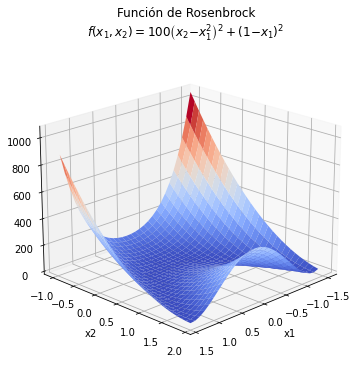

In [2]:
# Respuesta 1.5.
import numpy as np
import matplotlib.pyplot as plt
import importlib

importlib.reload(lib_t3)
# Setting up input values
x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.0, 2.0, 0.1)
X, Y = np.meshgrid(x, y)
# Calculating the output and storing it in the array Z
Z = f_Rosenbrock_graph(X,Y)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='coolwarm', edgecolor='none')
ax.set_title("Función de Rosenbrock\n"+r"$f(x_1,x_2)=100\left(x_2 − x_1^2 \right)^2 + (1 − x_1)^2$")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.view_init(20, 45)

Y la vista 2D la obtenemos con la función `imshow`

Text(0, 0.5, 'x2')

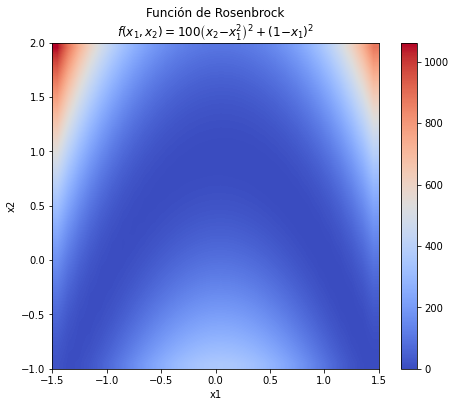

In [3]:
# Tambien se puede crear una vista 2D de la superficie
fig = plt.figure(figsize=(8,6))
im = plt.imshow(Z, cmap='coolwarm', extent=(-1.5, 1.5, -1.0, 2.0),interpolation='bilinear')
plt.colorbar(im)
plt.title("Función de Rosenbrock\n"+r"$f(x_1,x_2)=100\left(x_2 − x_1^2 \right)^2 + (1 − x_1)^2$")
plt.xlabel("x1")
plt.ylabel("x2")

Y se observa que el mínimo local de $f$ es de hecho global pues $f(\mathbf{x})\geq 0$ para todo $\mathbf{x}\in\mathbb{R}^2$ por ser suma de dos reales al cuadrado y $f(x_{\ast})=0$

## Ejercicio 2 (3 puntos)

Programe la función que devuelve una aproximación del gradiente de una función
en un punto particular usando diferencias finitas.

1. La función que calcula la aproximación debe recibir como parámetros 
   una función escalar $f$, el punto $x$ y el incremento $h>0$.
- Si $n$ es el tamaño del arreglo $x$, cree un arreglo de tamaño $n$
  para almacenar las componentes de las aproximaciones del vector gradiente.
  Para aproximar la $i$-ésima derivada parcial use

$$ \frac{\partial f}{\partial x_i}(x) \approx
\frac{f(x + he_i) - f(x)}{h}, $$

  donde $e_i$ es el $i$-ésimo vector canónico.

2. Pruebe la función comparando el gradiente analítico de la función
   de Rosenbrock en varios puntos y varios valores del parámetro $h$:
   
- Seleccione $h \in \{0.001, 0.0001, 0.00001 \}$.

- Tome $x = (-1.5,2) + \lambda (2.5,-1)$ con $\lambda \in \{0, 0.5, 1.0\}$.
  Imprima el valor $h$, el punto $x$, el gradiente $g_{a}(x)$ obtenido
  con la función analítica programada en el Ejercicio 1, 
  el gradiente $g_{df}(x;h)$ obtenido por diferencias finitas y
  la norma del vector $\|g_{a}(x) - g_{df}(x;h)\|$ (puede elegir la norma
  que quiera usar).
   

### Solución:

La función que resuelve el numeral 1 es `diff_f`,que está en el módulo `lib_t3.py`, la cual recibe como argumendo una función escalar $f$, el vector $\mathbf{x}$ donde se calculará la derivada y el tamaño de paso $h$ empleado en la aproximación por diferencias finitas. 

Para $h=0.001$ imprimimos el tamaño de paso $h$, el valor del gradiente analítico $g_a(x)$ iterando sobre $\lambda$, el valor del gradiente obtenido por diferencias finitas $g_{df}(x;h)$ y la norma euclideana $\lVert g_a(x)-g_{df}(x;h) \rVert_2$.

In [4]:
# Respuesta 2.1.
h=np.array([1e-3,1e-4,1e-5])
x1,x2=np.array([-1.5,2.0]),np.array([2.5,-1.0])
lamb=np.array([0.0,0.5,1.0])
print('El tamaño de paso es: ',h[0])
print('\n')
for l in lamb:
    grad_a=grad_Rosenbrock(x1+l*x2)
    grad_df=diff_f(f_Rosenbrock,x1+l*x2,h[0])
    print(f'El valor donde se calcula la derivada es: {x1+l*x2}')
    print(f'El gradiente analítico en {x1+l*x2} es:\n {grad_a}')
    print(f'El gradiente por diferencias finitas en {x1+l*x2} es:\n {grad_df}')
    print(f'La norma 2 ||g_df-g_a|| en {x1+l*x2} es:\n {np.linalg.norm((grad_a-grad_df))}')
    print('\n\n')

El tamaño de paso es:  0.001


El valor donde se calcula la derivada es: [-1.5  2. ]
El gradiente analítico en [-1.5  2. ] es:
 [[-155.]
 [ -50.]]
El gradiente por diferencias finitas en [-1.5  2. ] es:
 [[-154.0496]
 [ -49.9   ]]
La norma 2 ||g_df-g_a|| en [-1.5  2. ] es:
 0.9556465612998835



El valor donde se calcula la derivada es: [-0.25  1.5 ]
El gradiente analítico en [-0.25  1.5 ] es:
 [[141.25]
 [287.5 ]]
El gradiente por diferencias finitas en [-0.25  1.5 ] es:
 [[140.9884]
 [287.6   ]]
La norma 2 ||g_df-g_a|| en [-0.25  1.5 ] es:
 0.2800616140542944



El valor donde se calcula la derivada es: [1. 1.]
El gradiente analítico en [1. 1.] es:
 [[0.]
 [0.]]
El gradiente por diferencias finitas en [1. 1.] es:
 [[0.4014]
 [0.1   ]]
La norma 2 ||g_df-g_a|| en [1. 1.] es:
 0.4136689984515496





Con $h=0.001$ obtenemos un error del orden de $10^{-1}$ para cada valor donde obtuvimos el gradiente. 
Repitiendo el experimento pero ahora con tamaño de paso $h=0.0001$ obtenemos los siguientes resultados

In [5]:
print('El tamaño de paso es: ',h[1])
print('\n')
for l in lamb:
    grad_a=grad_Rosenbrock(x1+l*x2)
    grad_df=diff_f(f_Rosenbrock,x1+l*x2,h[1])
    print(f'El valor donde se calcula la derivada es: {x1+l*x2}')
    print(f'El gradiente analítico en {x1+l*x2} es:\n {grad_a}')
    print(f'El gradiente por diferencias finitas en {x1+l*x2} es:\n {grad_df}')
    print(f'La norma 2 ||g_df-g_a|| en {x1+l*x2} es:\n {np.linalg.norm((grad_a-grad_df))}')
    print('\n\n')

El tamaño de paso es:  0.0001


El valor donde se calcula la derivada es: [-1.5  2. ]
El gradiente analítico en [-1.5  2. ] es:
 [[-155.]
 [ -50.]]
El gradiente por diferencias finitas en [-1.5  2. ] es:
 [[-154.9049]
 [ -49.99  ]]
La norma 2 ||g_df-g_a|| en [-1.5  2. ] es:
 0.09561835007987253



El valor donde se calcula la derivada es: [-0.25  1.5 ]
El gradiente analítico en [-0.25  1.5 ] es:
 [[141.25]
 [287.5 ]]
El gradiente por diferencias finitas en [-0.25  1.5 ] es:
 [[141.2238]
 [287.51  ]]
La norma 2 ||g_df-g_a|| en [-0.25  1.5 ] es:
 0.027997764395229302



El valor donde se calcula la derivada es: [1. 1.]
El gradiente analítico en [1. 1.] es:
 [[0.]
 [0.]]
El gradiente por diferencias finitas en [1. 1.] es:
 [[0.0401]
 [0.01  ]]
La norma 2 ||g_df-g_a|| en [1. 1.] es:
 0.04133195886983942





Aquí con $h=0.0001$ obtuvimos diferencia entre el gradiente analítico y numérico del orden de $10^{-2}$. Finalmente, considerando $h=0.00001$ obtenemos

In [6]:
print('El tamaño de paso es: ',h[2])
print('\n')
for l in lamb:
    grad_a=grad_Rosenbrock(x1+l*x2)
    grad_df=diff_f(f_Rosenbrock,x1+l*x2,h[2])
    print(f'El valor donde se calcula la derivada es: {x1+l*x2}')
    print(f'El gradiente analítico en {x1+l*x2} es:\n {grad_a}')
    print(f'El gradiente por diferencias finitas en {x1+l*x2} es:\n {grad_df}')
    print(f'La norma 2 ||g_df-g_a|| en {x1+l*x2} es:\n {np.linalg.norm(grad_a-grad_df)}')
    print('\n\n')

El tamaño de paso es:  1e-05


El valor donde se calcula la derivada es: [-1.5  2. ]
El gradiente analítico en [-1.5  2. ] es:
 [[-155.]
 [ -50.]]
El gradiente por diferencias finitas en [-1.5  2. ] es:
 [[-154.9905]
 [ -49.999 ]]
La norma 2 ||g_df-g_a|| en [-1.5  2. ] es:
 0.00956237097442853



El valor donde se calcula la derivada es: [-0.25  1.5 ]
El gradiente analítico en [-0.25  1.5 ] es:
 [[141.25]
 [287.5 ]]
El gradiente por diferencias finitas en [-0.25  1.5 ] es:
 [[141.2474]
 [287.501 ]]
La norma 2 ||g_df-g_a|| en [-0.25  1.5 ] es:
 0.0027996949222215094



El valor donde se calcula la derivada es: [1. 1.]
El gradiente analítico en [1. 1.] es:
 [[0.]
 [0.]]
El gradiente por diferencias finitas en [1. 1.] es:
 [[0.004]
 [0.001]]
La norma 2 ||g_df-g_a|| en [1. 1.] es:
 0.004132846573836989





Y en este caso obtuvimos una diferencia entre los gradientes del orden de $10^{-3}$ con respecto a la norma euclideana. 

## Ejercicio 3 (3 puntos)

Programe la función que devuelve una aproximación de la Hessiana de una función
en un punto particular usando diferencias finitas.

1. La función que calcula la aproximación debe recibir como parámetros 
   una función escalar $f$, el punto $x$ y el incremento $h>0$.
- Si $n$ es el tamaño del arreglo $x$, cree una matriz de tamaño $n \times n$
  para almacenar las entradas de las aproximaciones de las segundas 
  derivadas parciales. Puede usar

$$ \frac{\partial^2 f}{\partial x_i \partial x_j}(x) \approx
\frac{f(x + he_i+he_j) - f(x+he_i)- f(x+he_j) + f(x)}{h^2}, $$

  donde $e_i$ es el $i$-ésimo vector canónico.

2. Pruebe la función comparando el gradiente analítico de la función
   de Rosenbrock en varios puntos y varios valores del parámetro $h$:
- Seleccione $h \in \{0.001, 0.0001, 0.00001 \}$
- Tome $x = (-1.5,2) + \lambda (2.5,-1)$ con $\lambda \in \{0, 0.5, 1.0\}$
  Imprima el valor $h$, el punto $x$, la Hessiana $H_{a}(x)$ obtenido
  con la función analítica programada en el Ejercicio 1, 
  la Hessiana $H_{df}(x;h)$ obtenido por diferencias finitas y
  la norma de la matriz $\|H_{a}(x) - H_{df}(x;h)\|$ (puede elegir la norma
  que quiera usar).

### Solución:
   

La función que resuelve el numeral 1 es `hess_f`, que está en el módulo `lib_t3.py`, la cual recibe como argumendo una función escalar $f$, el vector $\mathbf{x}$ donde se calculará la derivada y el tamaño de paso $h$ empleado en la aproximación por diferencias finitas. 

Para $h=0.001$ imprimimos el tamaño de paso $h$, el valor del hessiano analítico $H_a(x)$ iterando sobre $\lambda$, el valor del hessiano obtenido por diferencias finitas $H_{df}(x;h)$ y la norma de Fröbenius $\lVert H_a(x)-H_{df}(x;h) \rVert_F$.

In [7]:
# Respuesta 3.1.
print('El tamaño de paso es: ',h[0])
print('\n')
for l in lamb:
    hess_a=hess_Rosenbrock(x1+l*x2)
    hess_df=hess_f(f_Rosenbrock,x1+l*x2,h[0])
    norm_hess=np.linalg.norm((hess_a-hess_df),ord='fro')
    print(f'El valor donde se calcula el hessiano es: {x1+l*x2}')
    print(f'El hessiano analítico en {x1+l*x2} es:\n {hess_a}')
    print(f'El hessiano por diferencias finitas en {x1+l*x2} es:\n {hess_df}')
    print(f'La norma de Frobenius ||H_df-H_a|| en {x1+l*x2} es:\n {norm_hess}')
    print('\n\n')

El tamaño de paso es:  0.001


El valor donde se calcula el hessiano es: [-1.5  2. ]
El hessiano analítico en [-1.5  2. ] es:
 [[1902.  600.]
 [ 600.  200.]]
El hessiano por diferencias finitas en [-1.5  2. ] es:
 [[1898.4014  599.8   ]
 [ 599.8     200.    ]]
La norma de Frobenius ||H_df-H_a|| en [-1.5  2. ] es:
 3.6096983250551644



El valor donde se calcula el hessiano es: [-0.25  1.5 ]
El hessiano analítico en [-0.25  1.5 ] es:
 [[-523.  100.]
 [ 100.  200.]]
El hessiano por diferencias finitas en [-0.25  1.5 ] es:
 [[-523.5986   99.8   ]
 [  99.8     200.    ]]
La norma de Frobenius ||H_df-H_a|| en [-0.25  1.5 ] es:
 0.662058898046224



El valor donde se calcula el hessiano es: [1. 1.]
El hessiano analítico en [1. 1.] es:
 [[ 802. -400.]
 [-400.  200.]]
El hessiano por diferencias finitas en [1. 1.] es:
 [[ 804.4014 -400.2   ]
 [-400.2     200.    ]]
La norma de Frobenius ||H_df-H_a|| en [1. 1.] es:
 2.417999577950844





Respecto a las norma de Frobenius la diferencia entre el hessiano analítico y el hessiano obtenido por diferencias finitas ronda entre los ordenes $10^{-1}$ y $1$ par aun tamaño de paso $h=0.001$.

Considerando $h=0.0001$ obtenemos lo siguiente

In [9]:
print('El tamaño de paso es: ',h[1])
print('\n')
for l in lamb:
    hess_a=hess_Rosenbrock(x1+l*x2)
    hess_df=hess_f(f_Rosenbrock,x1+l*x2,h[1])
    norm_hess=np.linalg.norm((hess_a-hess_df),ord='fro')
    print(f'El valor donde se calcula el hessiano es: {x1+l*x2}')
    print(f'El hessiano analítico en {x1+l*x2} es:\n {hess_a}')
    print(f'El hessiano por diferencias finitas en {x1+l*x2} es:\n {hess_df}')
    print(f'La norma de Frobenius ||H_df-H_a|| en {x1+l*x2} es:\n {norm_hess}')
    print('\n\n')

El tamaño de paso es:  0.0001


El valor donde se calcula el hessiano es: [-1.5  2. ]
El hessiano analítico en [-1.5  2. ] es:
 [[1902.  600.]
 [ 600.  200.]]
El hessiano por diferencias finitas en [-1.5  2. ] es:
 [[1901.64  599.98]
 [ 599.98  200.  ]]
La norma de Frobenius ||H_df-H_a|| en [-1.5  2. ] es:
 0.36109597644905883



El valor donde se calcula el hessiano es: [-0.25  1.5 ]
El hessiano analítico en [-0.25  1.5 ] es:
 [[-523.  100.]
 [ 100.  200.]]
El hessiano por diferencias finitas en [-0.25  1.5 ] es:
 [[-523.06   99.98]
 [  99.98  200.  ]]
La norma de Frobenius ||H_df-H_a|| en [-0.25  1.5 ] es:
 0.06632005904773697



El valor donde se calcula el hessiano es: [1. 1.]
El hessiano analítico en [1. 1.] es:
 [[ 802. -400.]
 [-400.  200.]]
El hessiano por diferencias finitas en [1. 1.] es:
 [[ 802.24 -400.02]
 [-400.02  200.  ]]
La norma de Frobenius ||H_df-H_a|| en [1. 1.] es:
 0.24167482336199914





En este caso la diferencia entre el hessiano analítico y numérico ronda entre los ordenes $10^{-2}$ y $10^{-1}$ para cada valor de $\mathbf{x}$.

Finalmente, para $h=0.00001$ los resultados son los siguientes

In [10]:
print('El tamaño de paso es: ',h[2])
print('\n')
for l in lamb:
    hess_a=hess_Rosenbrock(x1+l*x2)
    hess_df=hess_f(f_Rosenbrock,x1+l*x2,h[2])
    norm_hess=np.linalg.norm((hess_a-hess_df),ord='fro')
    print(f'El valor donde se calcula el hessiano es: {x1+l*x2}')
    print(f'El hessiano analítico en {x1+l*x2} es:\n {hess_a}')
    print(f'El hessiano por diferencias finitas en {x1+l*x2} es:\n {hess_df}')
    print(f'La norma de Frobenius ||H_df-H_a|| en {x1+l*x2} es:\n {norm_hess}')
    print('\n\n')

El tamaño de paso es:  1e-05


El valor donde se calcula el hessiano es: [-1.5  2. ]
El hessiano analítico en [-1.5  2. ] es:
 [[1902.  600.]
 [ 600.  200.]]
El hessiano por diferencias finitas en [-1.5  2. ] es:
 [[1901.964  599.998]
 [ 599.998  200.   ]]
La norma de Frobenius ||H_df-H_a|| en [-1.5  2. ] es:
 0.03608399064911253



El valor donde se calcula el hessiano es: [-0.25  1.5 ]
El hessiano analítico en [-0.25  1.5 ] es:
 [[-523.  100.]
 [ 100.  200.]]
El hessiano por diferencias finitas en [-0.25  1.5 ] es:
 [[-523.0055   99.9984]
 [  99.9984  200.0002]]
La norma de Frobenius ||H_df-H_a|| en [-0.25  1.5 ] es:
 0.005960397911606387



El valor donde se calcula el hessiano es: [1. 1.]
El hessiano analítico en [1. 1.] es:
 [[ 802. -400.]
 [-400.  200.]]
El hessiano por diferencias finitas en [1. 1.] es:
 [[ 802.024 -400.002]
 [-400.002  200.   ]]
La norma de Frobenius ||H_df-H_a|| en [1. 1.] es:
 0.024166244287936563





Y aquí la norma de Frobenius de la diferencia entre el hessiano analítico y númerico ronda entre los ordenes $10^{-3}$ y $10^{-2}$.

Podemos observar que en general, la aproximación del gradiente como del hessiano es mejor en $(-0.25,1.5)$, luego en $(1,1)$ y al final la peor aproximación se obtiene en $(-1.5,2)$ para cada valor de $h$.